In [73]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [56]:
file = "../data/SSCURVES(1-61).xlsx"
xls = pd.ExcelFile(file)

In [68]:
# Interpolate all data to the data with the shortest x-range

smallest_stress_range = [np.inf, None, None] # [range, idx, number of points]
for sheet in xls.sheet_names:
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    # TODO: Some data MUST be excluded, right? There are dataseries with less than 10 points.
    # I don't believe those could be good...
    if len(df) < 15:
        continue
    low = df['Stress'].min()
    high = df['Stress'].max()
    stress_range = high - low
    if stress_range < smallest_stress_range[0]:
        smallest_stress_range = [stress_range, sheet, len(df)]

print(f"Case {smallest_stress_range[1]} has the shortest strain range of {smallest_stress_range[0]} with {smallest_stress_range[2]} points.")

# X = []
# for sheet in xls.sheet_names:
#     df = pd.read_excel(file, sheet_name=sheet)
#     df = df.dropna(subset=['Strain', 'Stress'])
#     if len(df) < 10:
#         continue
    #  interpolated_stress = np.interp()

Case 32 has the shortest strain range of 0.39937500000000004 with 44 points.


In [78]:
df_list = []
for sheet in xls.sheet_names:
    df_list.append(pd.read_excel(file, sheet_name=sheet))

y_dflist = []
xc = int(smallest_stress_range[1])

for i in range(len(df_list)):
    # df = df_list[i].drop_duplicates(subset=['Stress'])
    # f2 = interp1d(df['Stress'], df['Strain'], kind='cubic')
    # interpolated = f2(df_list[xc]['Stress'])
    interpolated = np.interp(df_list[xc]['Stress'], df_list[i]['Stress'], df_list[i]['Strain'])
    y_dflist.append(interpolated)


X = np.array(y_dflist)
mu = np.mean(X, axis=0)

In [79]:
components = PCA(n_components=3).fit(X).components_
scores = PCA(n_components=3).fit(X).explained_variance_
mean = PCA(n_components=3).fit(X).mean_

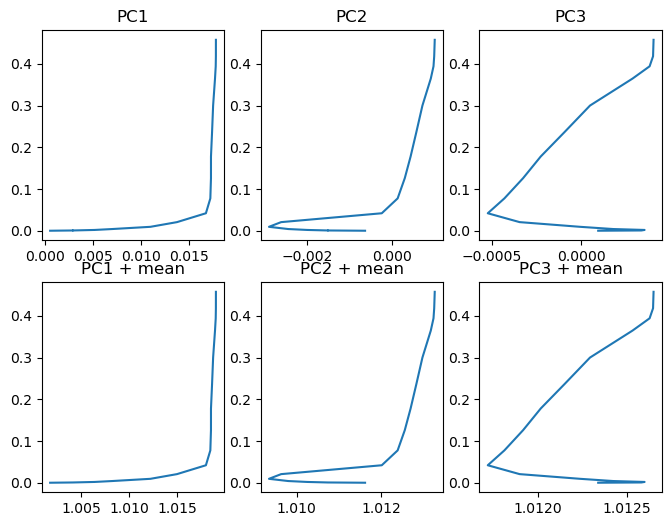

In [80]:
fig = plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(231)
ax.set_title("PC1")
ax.plot(scores[0] * components[0], df_list[xc]['Stress'])

ax = fig.add_subplot(232)
ax.set_title("PC2")
ax.plot(scores[1] * components[1], df_list[xc]['Stress'])

ax = fig.add_subplot(233)
ax.set_title("PC3")
ax.plot(scores[2] * components[2], df_list[xc]['Stress'])

ax = fig.add_subplot(234)
ax.set_title("PC1 + mean")
ax.plot(scores[0] * components[0] + mean[0], df_list[xc]['Stress'])

ax = fig.add_subplot(235)
ax.set_title("PC2 + mean")
ax.plot(scores[1] * components[1] + mean[1], df_list[xc]['Stress'])

ax = fig.add_subplot(236)
ax.set_title("PC3 + mean")
ax.plot(scores[2] * components[2] + mean[2], df_list[xc]['Stress'])

plt.show()